In [3]:
from lacbox.io import load_pwr, load_ind, load_inds
from lacbox.test import test_data_path
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import matplotlib.cm as cm

In [3]:
# functions

def compute_chord(radius, alpha, TSR, B):
    # equation A
    # compute normalized chord
    Cl = (2*np.pi)**2 /360 * alpha + 0.452
    norm_c = 16*np.pi/9 * (1 / (Cl * TSR**2 * B)) * 1/(radius/R)

    return norm_c

def compute_theta(radius, alpha, TSR, B):
    # equation B
    theta = 2/3 * (1/TSR* 1/(radius/R)) - np.deg2rad(alpha)

    return np.array(np.rad2deg(theta))

In [2]:
# data
TSR = 8
B = 3
r = 1
R = 89.17
R_first = 0.2*R         # check value
alpha = 5

radius = np.linspace(R_first, R, num=20)

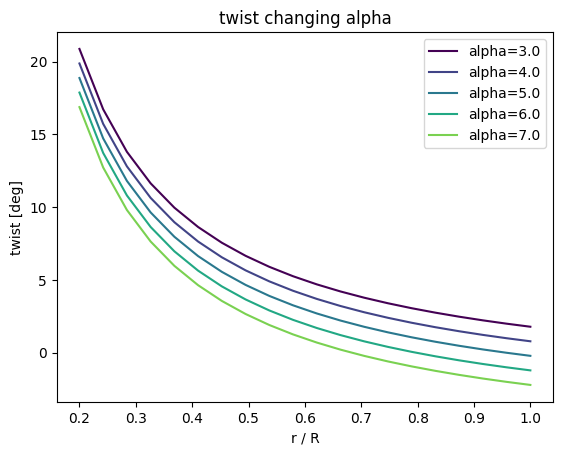

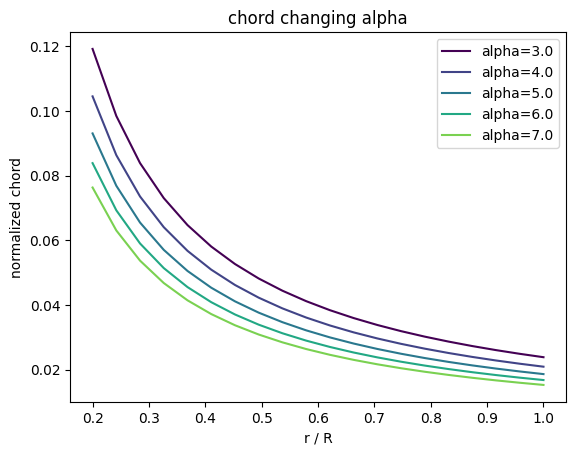

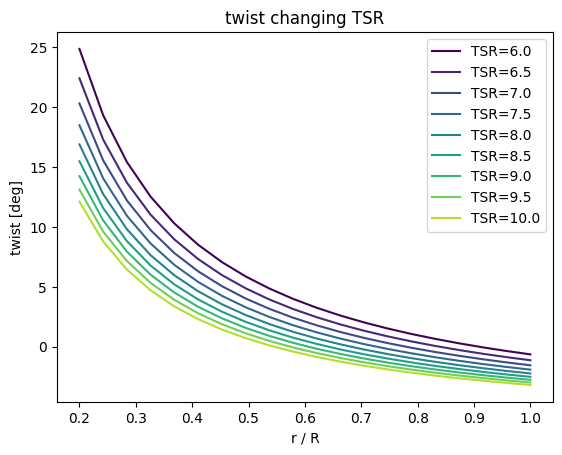

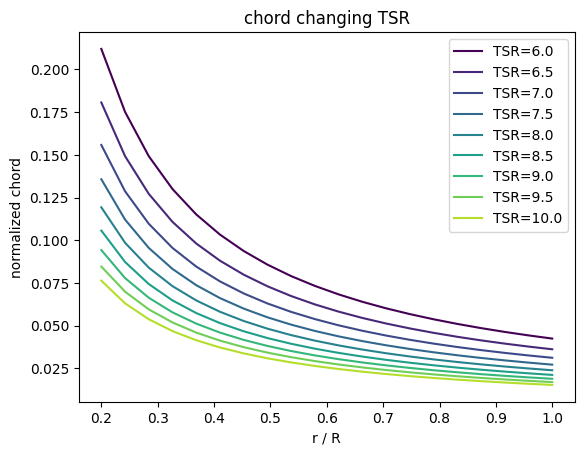

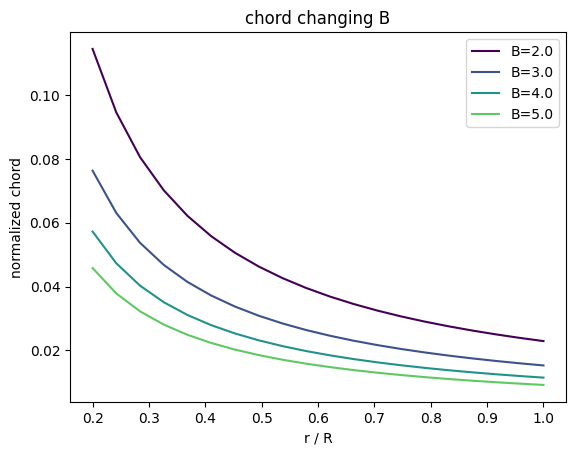

In [4]:
# assignment 01

alpha_array = np.linspace(3,7,num=5)
TSR_array = np.linspace(6,10,num=9)
B_array = np.linspace(2,5,num=4)

theta_matrix_alpha = np.zeros((len(alpha_array), len(radius)))
theta_matrix_TSR = np.zeros((len(TSR_array), len(radius)))
chord_matrix_alpha = np.zeros((len(alpha_array), len(radius)))
chord_matrix_TSR = np.zeros((len(TSR_array), len(radius)))
chord_matrix_B = np.zeros((len(B_array), len(radius)))


i = 0
for alpha in alpha_array:
    theta_matrix_alpha[i] =  compute_theta(radius, alpha, TSR, B)
    i += 1

i = 0
for TSR in TSR_array:
    theta_matrix_TSR[i] =  compute_theta(radius, alpha, TSR, B)
    i += 1


i = 0
for alpha in alpha_array:
    chord_matrix_alpha[i] = compute_chord(radius, alpha, TSR, B)
    i += 1

i = 0
for TSR in TSR_array:
    chord_matrix_TSR[i] = compute_chord(radius, alpha, TSR, B)
    i += 1

i = 0
for B in B_array:
    chord_matrix_B[i] = compute_chord(radius, alpha, TSR, B)
    i += 1


cmap = plt.get_cmap('viridis')

plt.figure()
plt.title('twist changing alpha')
for i in range(len(alpha_array)): 
    line_color = cmap(i/len(alpha_array-1))
    plt.plot(radius/R,theta_matrix_alpha[i,:], label=f'alpha={alpha_array[i]}', color=line_color)
plt.legend()
plt.xlabel('r / R')
plt.ylabel('twist [deg]')
plt.show()


plt.figure()
plt.title('chord changing alpha')
for i in range(len(alpha_array)): 
    line_color = cmap(i/len(alpha_array-1))
    plt.plot(radius/R,chord_matrix_alpha[i,:], label=f'alpha={alpha_array[i]}', color=line_color)
plt.legend()
plt.xlabel('r / R')
plt.ylabel('normalized chord')
plt.show()


plt.figure()
plt.title('twist changing TSR')
for i in range(len(TSR_array)): 
    line_color = cmap(i/len(TSR_array-1))
    plt.plot(radius/R,theta_matrix_TSR[i,:], label=f'TSR={TSR_array[i]}', color=line_color)
plt.legend()
plt.xlabel('r / R')
plt.ylabel('twist [deg]')
plt.show()


plt.figure()
plt.title('chord changing TSR')
for i in range(len(TSR_array)): 
    line_color = cmap(i/len(TSR_array-1))
    plt.plot(radius/R,chord_matrix_TSR[i,:], label=f'TSR={TSR_array[i]}', color=line_color)
plt.legend()
plt.xlabel('r / R')
plt.ylabel('normalized chord')
plt.show()

plt.figure()
plt.title('chord changing B')
for i in range(len(B_array)): 
    line_color = cmap(i/len(B_array-1))
    plt.plot(radius/R,chord_matrix_B[i,:], label=f'B={B_array[i]}', color=line_color)
plt.legend()
plt.xlabel('r / R')
plt.ylabel('normalized chord')
plt.show()

In [1]:
V_rated_X = 11.4 # m/s
I_rated_X = 0.16

R_X = 89.17 # m

#New Class IIIB
I_rated_Y = 0.14

C = (1 + 2*I_rated_X)/(1 + 2*I_rated_Y)
V_rated_Y = C**(13/9)* V_rated_X
R_Y = R_X * C**(1/3) * V_rated_X**(4/9)

print('V new', V_rated_Y)
print('R new', R_Y)


V new 11.918136396131217
R new 265.71061829362196


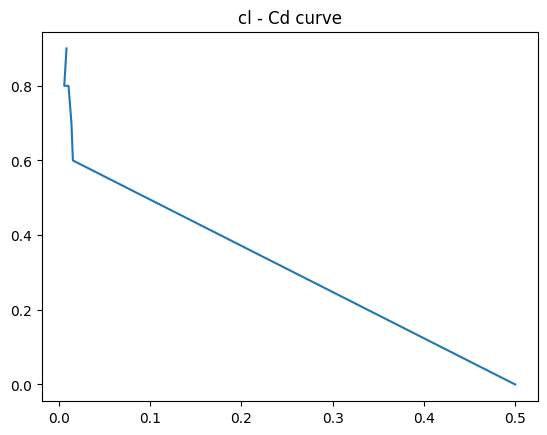

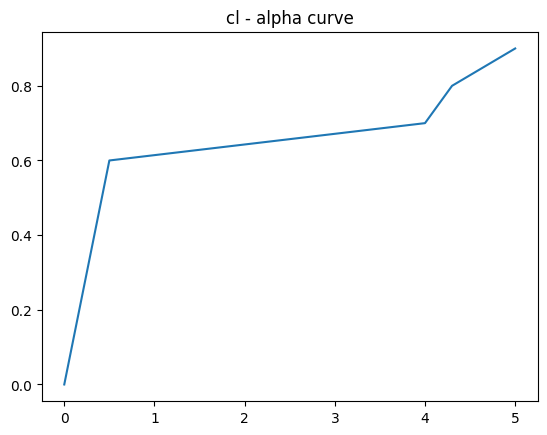

In [8]:
tc = [0, 15, 18, 24, 30, 36, 100, 105]
cl = np.array([0.9, 0.9, 0.8, 0.8, 0.7, 0.6, 0.0, 0.0])
cd = [0.00850, 0.00850, 0.00604, 0.0107, 0.0139, 0.0155, 0.5, 0.5]
aoa = [5.0, 5.0, 4.3, 4.3, 4.0, 0.5, 0.0, 0.0]

plt.figure()
plt.plot(cd, cl)
plt.title("cl - Cd curve")


plt.figure()
plt.plot(aoa, cl)
plt.title("cl - alpha curve")


plt.show()